In [4]:
from nltk.corpus import brown
import pandas as pd
import matplotlib.pyplot as plt
from n_gram_model import NGramModel

corpus = brown.sents()

train_corpus = corpus[:int(0.8 * len(corpus))]
validation_corpus = corpus[int(0.8 * len(corpus)):]

smoothing_techniques = ['none', 'laplace', 'good_turing', 'jelinek_mercer', 'kneser_ney', 'modified_kneser_ney']
n_values = [1, 2, 3, 4]

results = []

for smoothing in smoothing_techniques:
    for n in n_values:
        model = NGramModel(n=n, smoothing=smoothing)
        model.train(train_corpus)
        perplexity = model.perplexity(validation_corpus)
        results.append((smoothing, n, perplexity))
        print(f"Smoothing: {smoothing}, N: {n}, Perplexity: {perplexity}")

Smoothing: none, N: 1, Perplexity: 756.293463286062
Smoothing: none, N: 2, Perplexity: 4372.787736958007
Smoothing: none, N: 3, Perplexity: 2734609.408338904
Smoothing: none, N: 4, Perplexity: 204017704.8781295
Smoothing: laplace, N: 1, Perplexity: 601.9017247315586
Smoothing: laplace, N: 2, Perplexity: 577.9186179116277
Smoothing: laplace, N: 3, Perplexity: 2702.743244041112
Smoothing: laplace, N: 4, Perplexity: 4666.671160936945
Smoothing: good_turing, N: 1, Perplexity: 756.293463286062
Smoothing: good_turing, N: 2, Perplexity: 344743.28438613116
Smoothing: good_turing, N: 3, Perplexity: 82396877.91659142
Smoothing: good_turing, N: 4, Perplexity: 982967514.0477368
Smoothing: jelinek_mercer, N: 1, Perplexity: 756.293463286062
Smoothing: jelinek_mercer, N: 2, Perplexity: 5757.050128671211
Smoothing: jelinek_mercer, N: 3, Perplexity: 3159456.6710089757
Smoothing: jelinek_mercer, N: 4, Perplexity: 218473542.7725073
Smoothing: kneser_ney, N: 1, Perplexity: 5.357412831815826e-05
Smoothing:

In [5]:
df = pd.DataFrame(results, columns=['Smoothing', 'N', 'Perplexity'])
df_pivot = df.pivot(index='N', columns='Smoothing', values='Perplexity')
print(df_pivot)

Smoothing   good_turing  jelinek_mercer    kneser_ney      laplace  \
N                                                                    
1          7.562935e+02    7.562935e+02  5.357413e-05   601.901725   
2          3.447433e+05    5.757050e+03  3.222626e-01   577.918618   
3          8.239688e+07    3.159457e+06  6.149317e+03  2702.743244   
4          9.829675e+08    2.184735e+08  1.298865e+07  4666.671161   

Smoothing  modified_kneser_ney          none  
N                                             
1                 7.656115e+02  7.562935e+02  
2                 5.051753e+03  4.372788e+03  
3                 3.195935e+06  2.734609e+06  
4                 2.207854e+08  2.040177e+08  


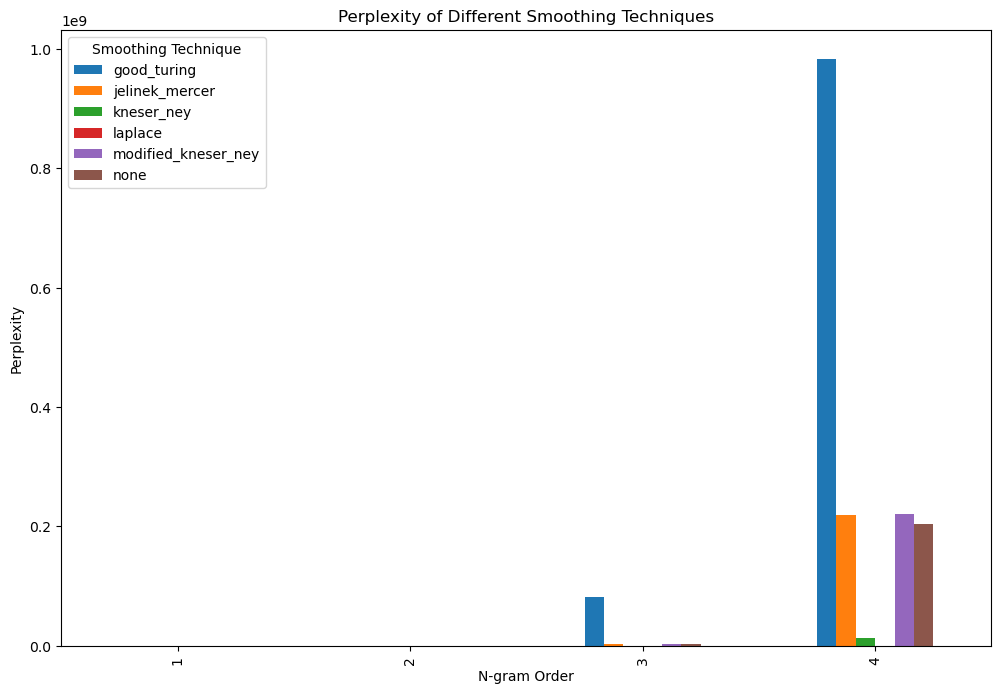

In [6]:
df_pivot.plot(kind='bar', figsize=(12, 8))
plt.xlabel('N-gram Order')
plt.ylabel('Perplexity')
plt.title('Perplexity of Different Smoothing Techniques')
plt.legend(title='Smoothing Technique')
plt.show()